# 1. Missing Completely at Random (MCAR)
Definition: The probability of data being missing is independent of both observed and unobserved data.

Example: A survey respondent accidentally skips a question due to a printing error.

Implication: Data is unbiased; dropping missing data points won't introduce systematic error.

# 2. Missing at Random (MAR)
Definition: The probability of missingness is related to observed data, but not the missing data itself.

Example: People with higher income (observed) are less likely to report their spending (missing).

Implication: Bias can be corrected if the variables related to missingness are included in the analysis.

# 3. Missing Not at Random (MNAR)
Definition: The missingness is related to the value of the missing data itself.

Example: People with depression are less likely to answer questions about mental health severity.

Implication: Difficult to handle; may require modeling the missingness explicitly or using advanced imputation methods.

In [1]:
import seaborn as sns


In [2]:
df= sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
df.shape

(891, 15)

# imputation missing values
1. Mean value imputation


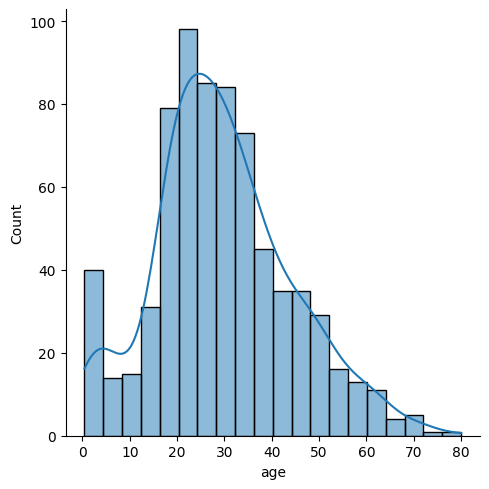

In [9]:
sns.displot(df['age'], kde=True)

In [13]:
df['Age mean']= df['age'].fillna(df['age'].mean())

In [15]:
df[['Age mean' , 'age']]

,Age mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [16]:
# mean imputation works well when we have normally distributed data


# 2.Median value imputation



In [17]:
df['age_median']=df['age'].fillna(df['age'].median())

In [18]:
df[['Age median' , 'age']]


,Age median,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [19]:
# 3. mode imputation technique - categorical values

In [20]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age median,Age mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0,62.0


In [21]:
df['embarked'].unique()


array(['S', 'C', 'Q', nan], dtype=object)

In [27]:
mod_val=df[df['embarked'].notna()]['embarked'].mode()[0]

In [29]:
df['embarked_mode']= df['embarked'].fillna(mod_val)

In [31]:
df[['embarked_mode' , 'embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [32]:
df['embarked_mode'].isnull().sum()

np.int64(0)